In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv("Country-data.csv")

In [6]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [11]:
df.shape[0]

167

167 countries

Text(0, 0.5, 'child_mortality_per_1000_child')

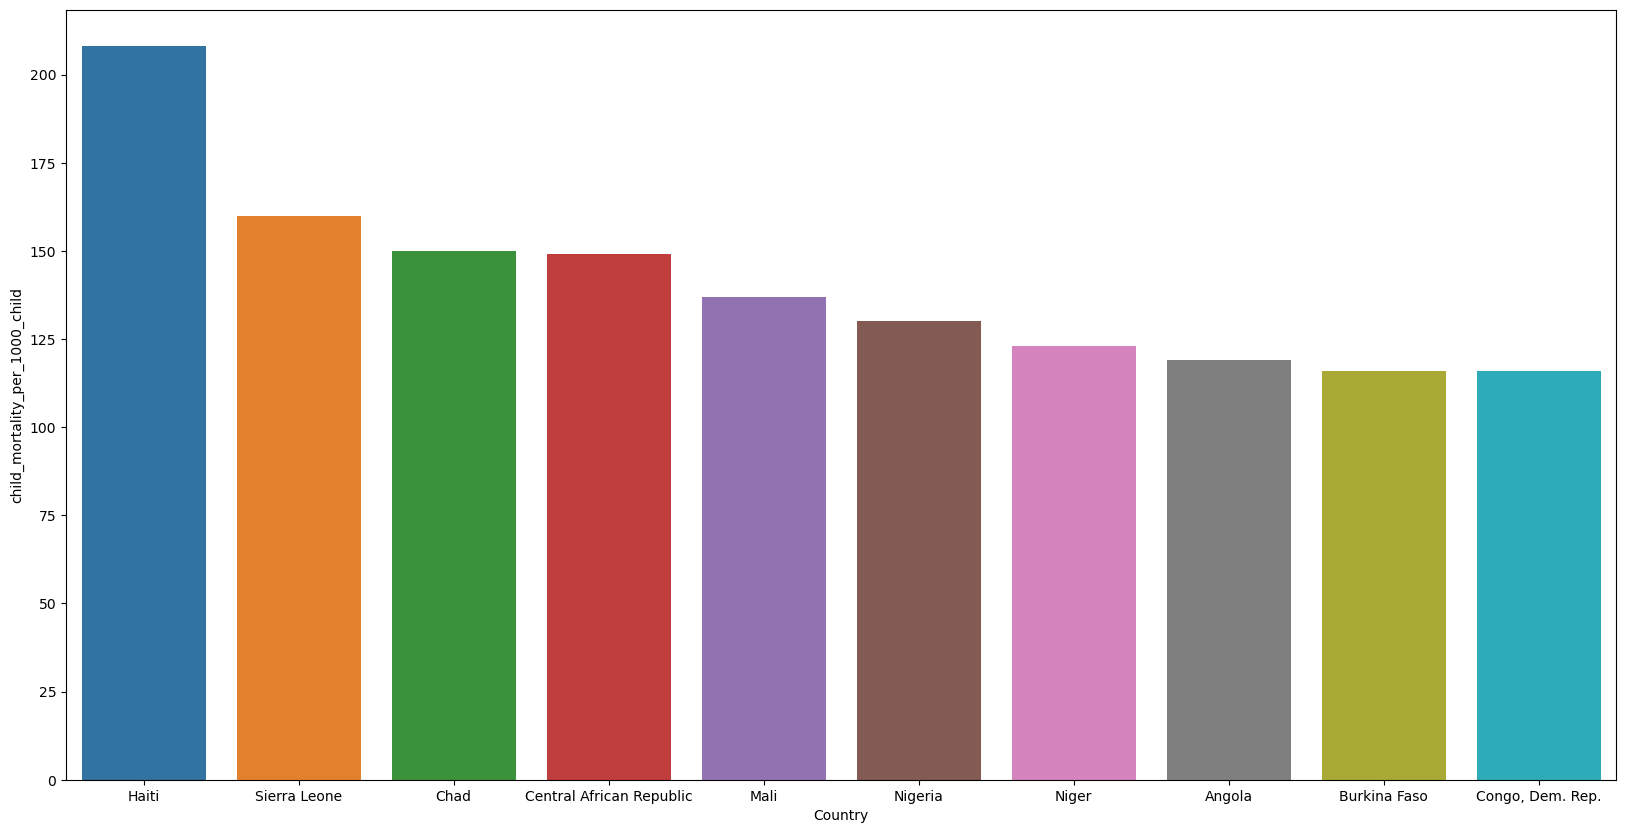

In [19]:
plt.figure(figsize=(20,10))
sns.barplot(x="country",y="child_mort",data=df.sort_values("child_mort",ascending=False).head(10))
plt.xlabel("Country")
plt.ylabel("child_mortality_per_1000_child")

Text(0, 0.5, 'exports')

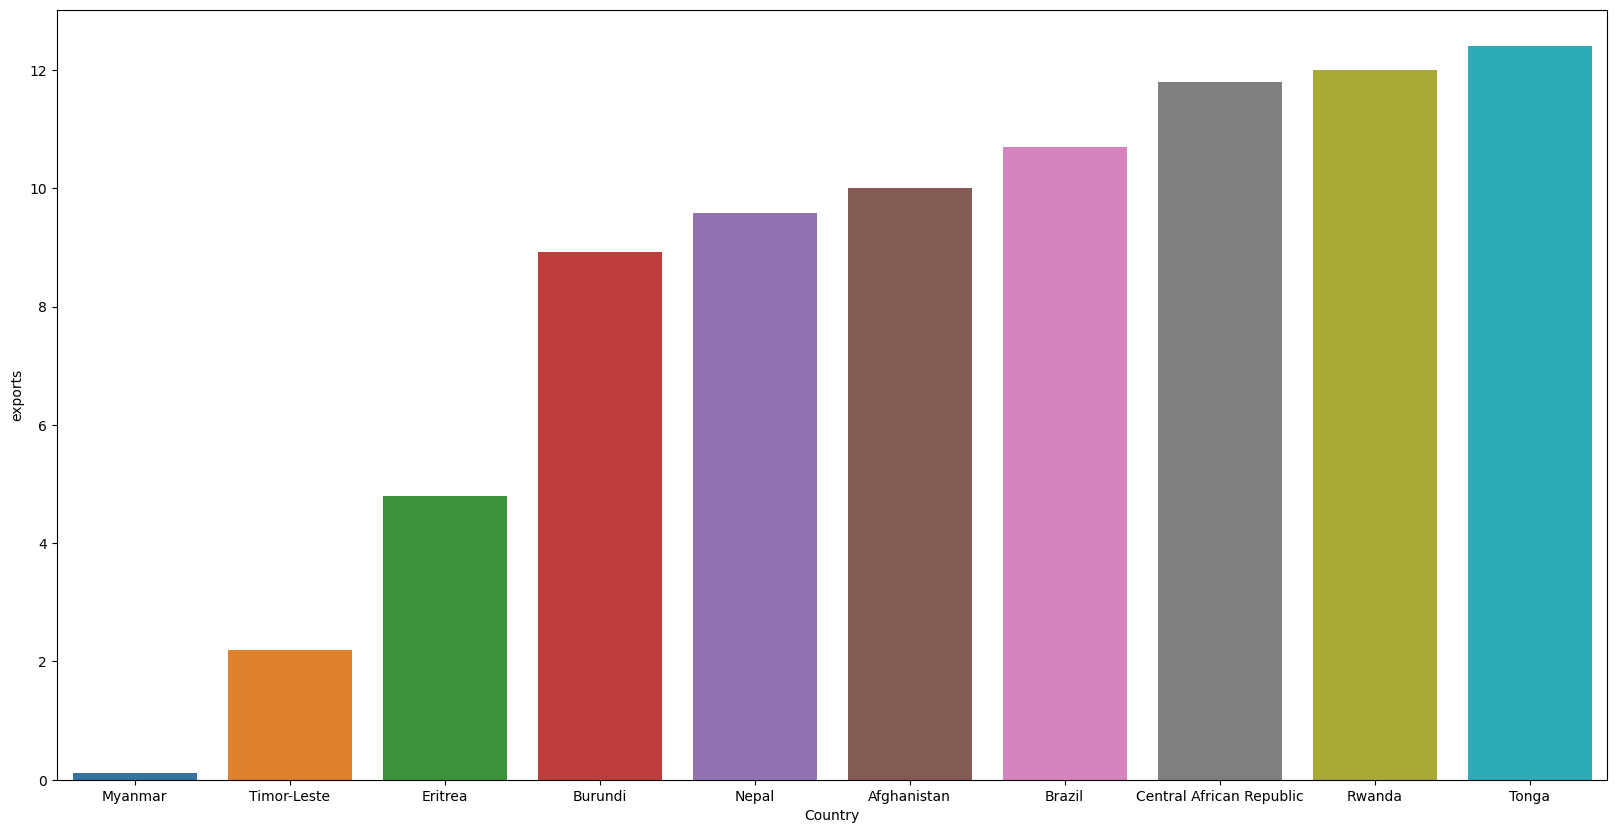

In [22]:
plt.figure(figsize=(20,10))
sns.barplot(x="country",y="exports",data=df.sort_values("exports").head(10))
plt.xlabel("Country")
plt.ylabel("exports")

Text(0, 0.5, 'health')

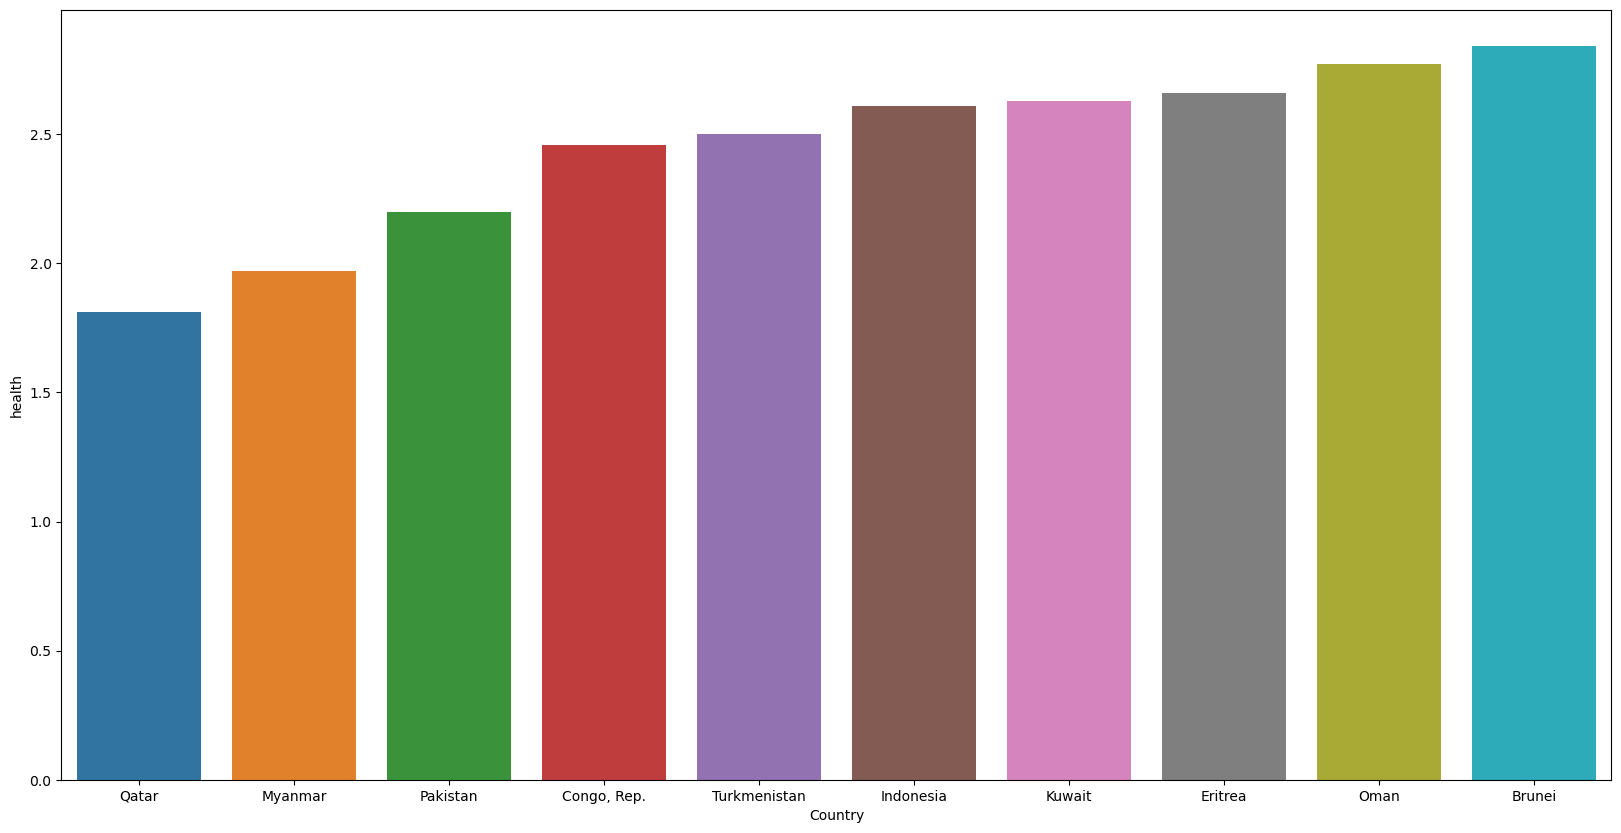

In [23]:
plt.figure(figsize=(20,10))
sns.barplot(x="country",y="health",data=df.sort_values("health").head(10))
plt.xlabel("Country")
plt.ylabel("health")

Text(0, 0.5, 'imports')

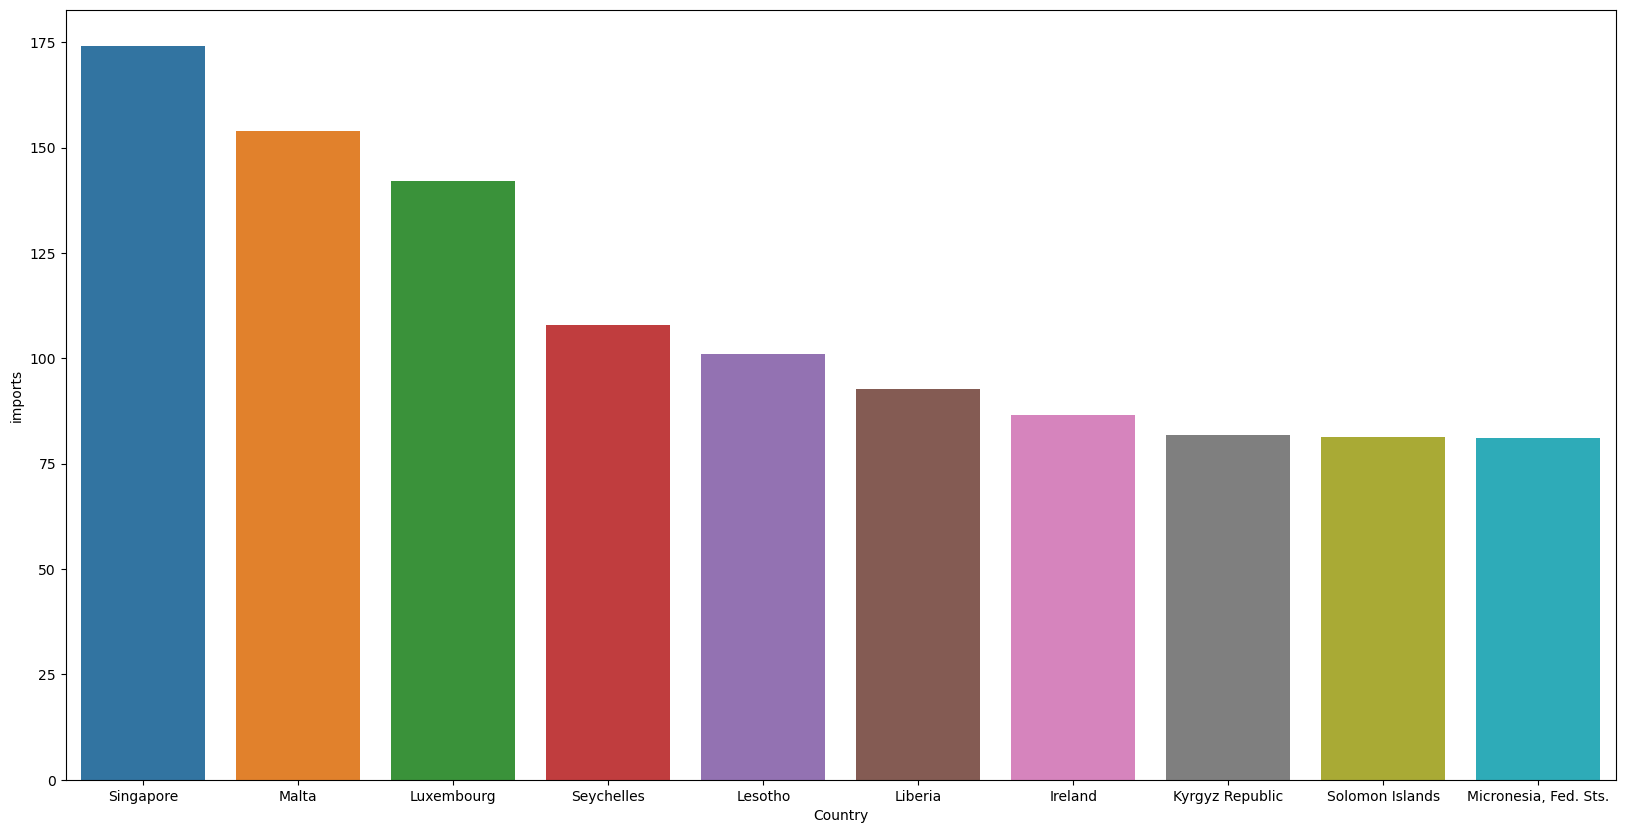

In [26]:
plt.figure(figsize=(20,10))
sns.barplot(x="country",y="imports",data=df.sort_values("imports",ascending=False).head(10))
plt.xlabel("Country")
plt.ylabel("imports")

Text(0, 0.5, 'income')

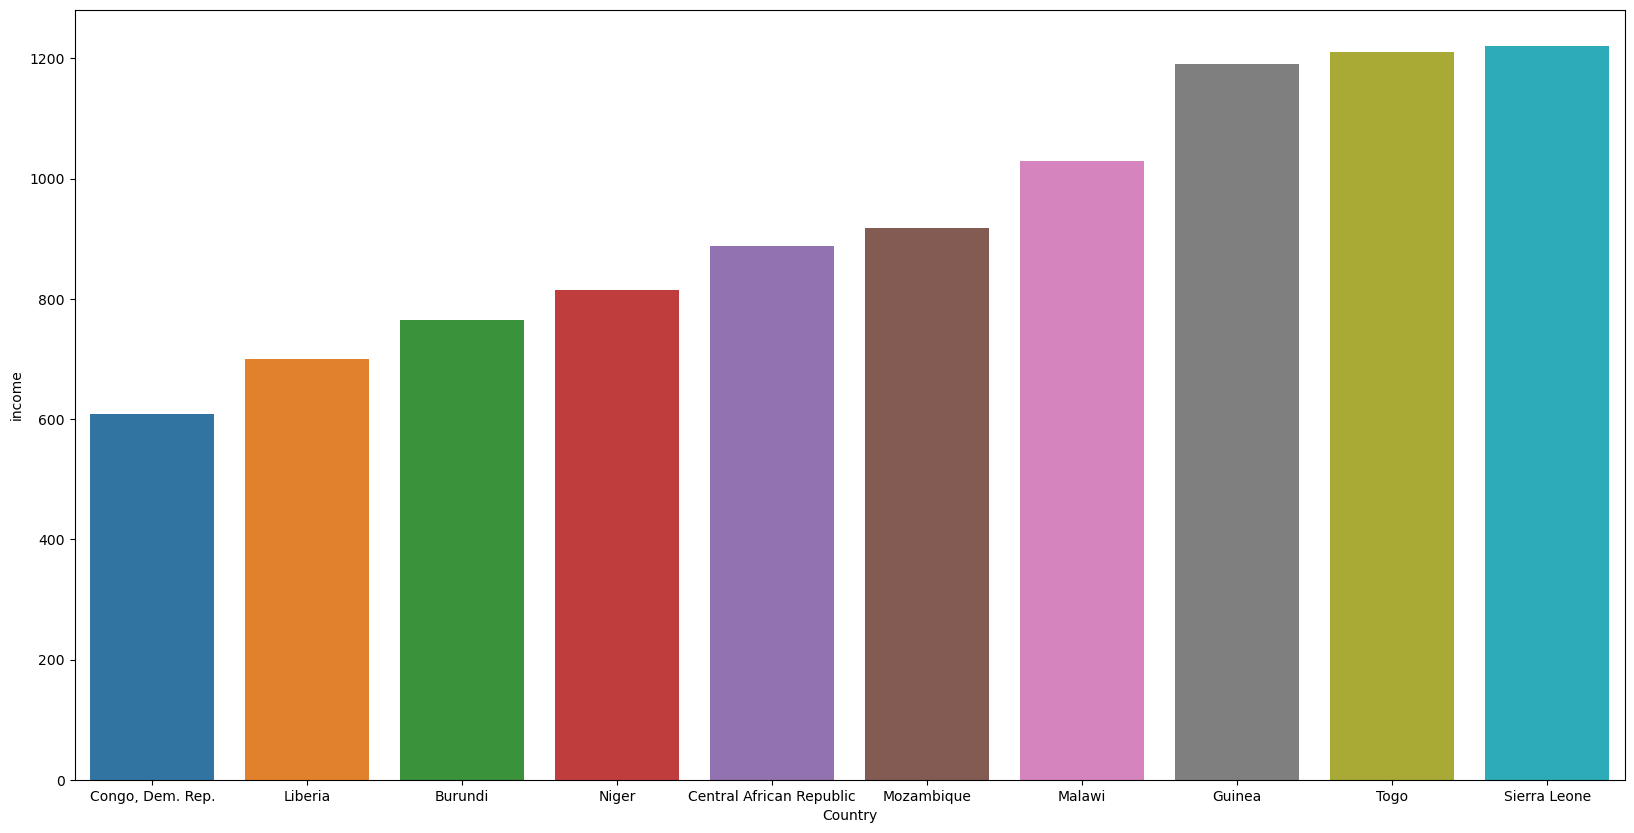

In [27]:
plt.figure(figsize=(20,10))
sns.barplot(x="country",y="income",data=df.sort_values("income",).head(10))
plt.xlabel("Country")
plt.ylabel("income")

Text(0, 0.5, 'gdpp')

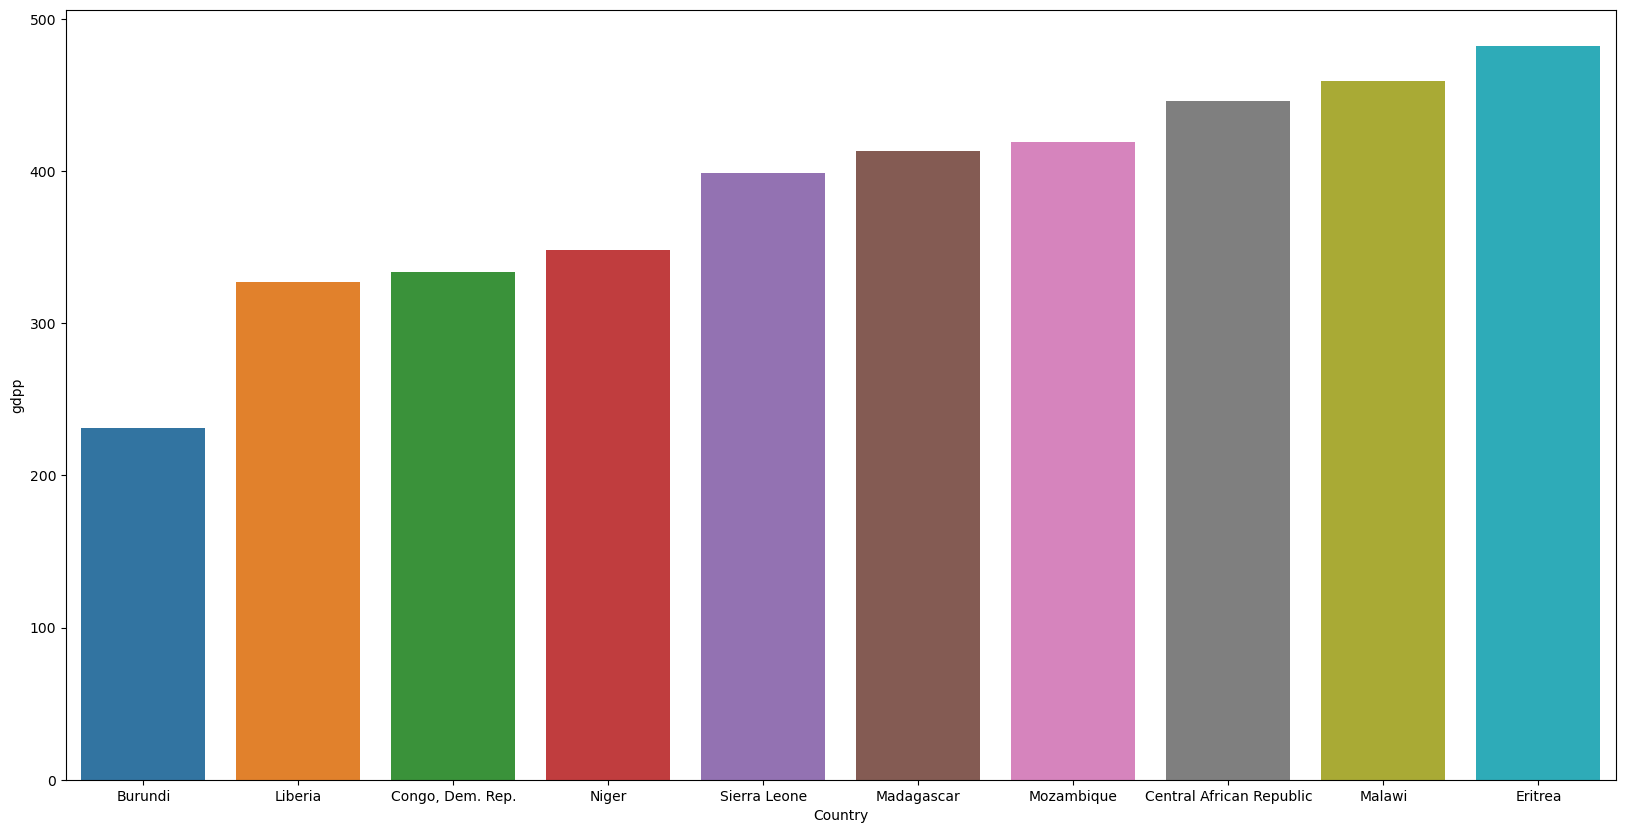

In [28]:
plt.figure(figsize=(20,10))
sns.barplot(x="country",y="gdpp",data=df.sort_values("gdpp",).head(10))
plt.xlabel("Country")
plt.ylabel("gdpp")

In [29]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [32]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [33]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [40]:
df_temp=df.drop("country",axis=1)

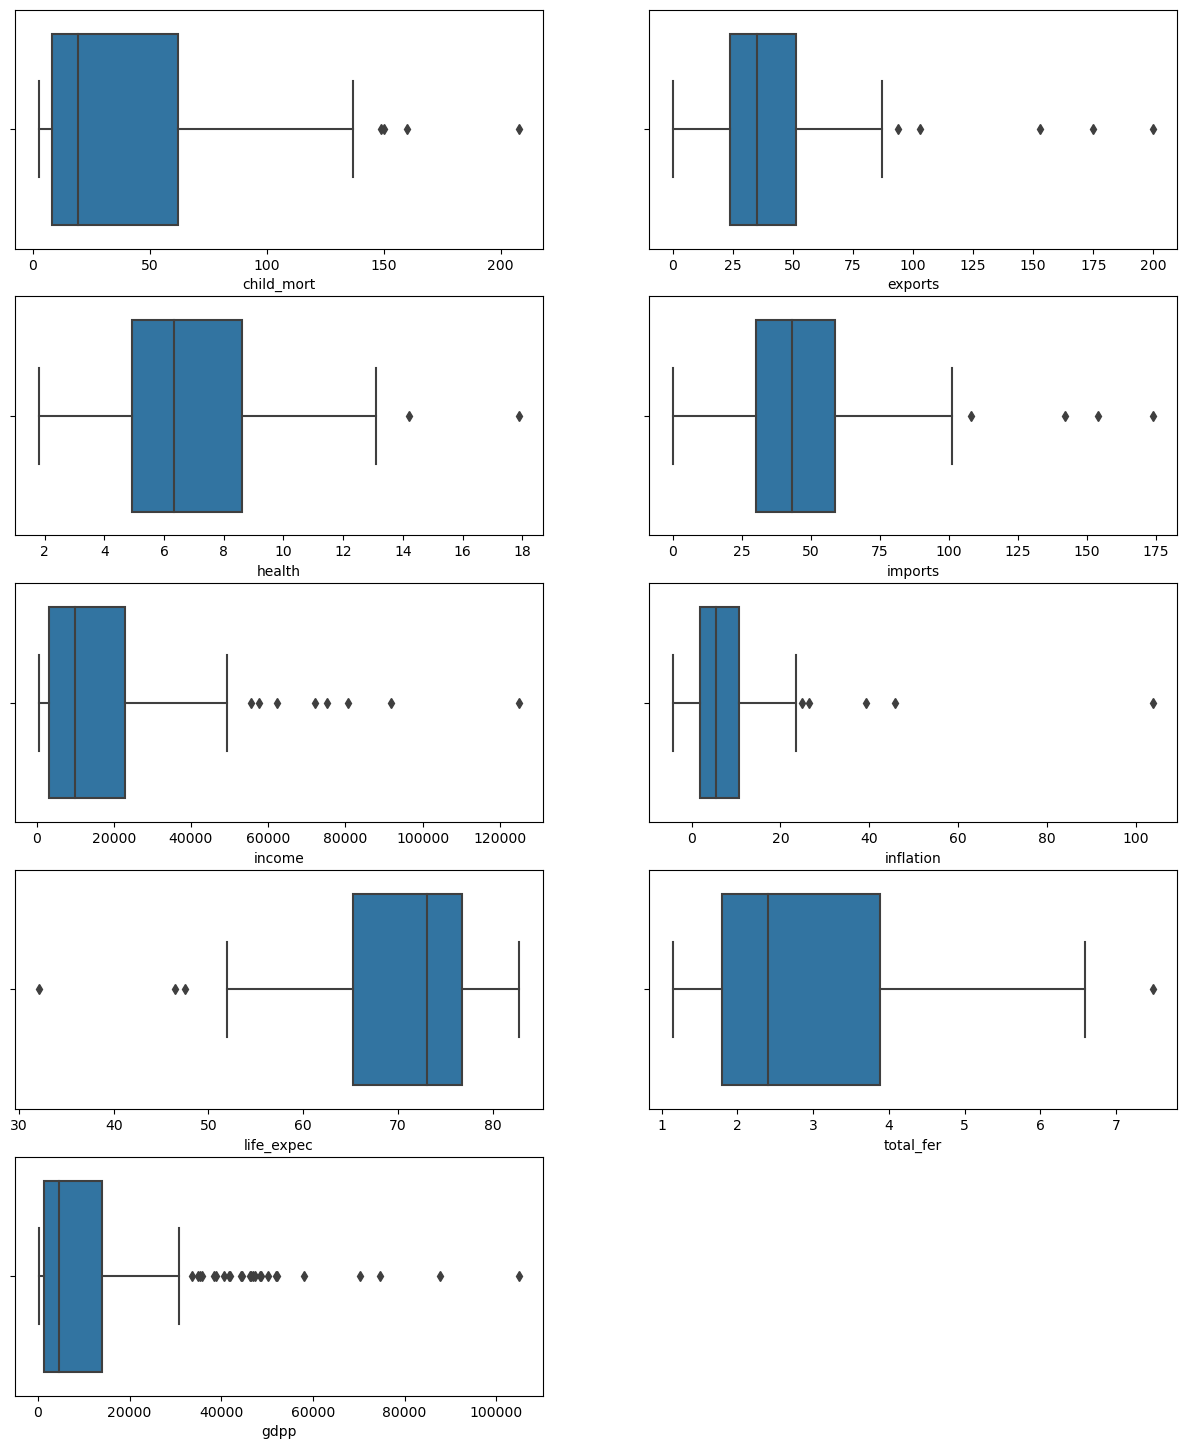

In [47]:
plt.figure(figsize=(15,18))
count=1;
for column in df_temp.columns:
    plt.subplot(5,2,count)
    count+=1
    sns.boxplot(x=column,data=df_temp)

we can see there is some outliers and we will handle it in pca

<Axes: >

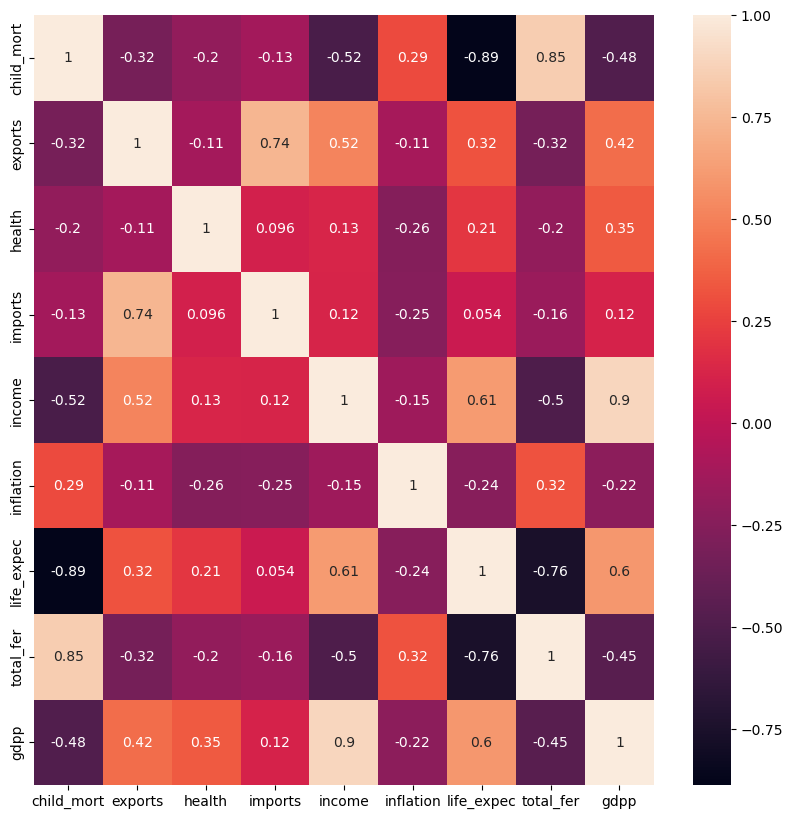

In [52]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True),annot=True)

from above heatmap, we can see exports is highly correlated with import. health, exports, income,imports are highly correlated with gdpp. So, it will be treated after performing PCA.

### Data Preparation

#### Performing PCA on the data ( Principal Component Analysis)

In [54]:
## First let us see if we can explain the dataset using fewer variables
from sklearn.preprocessing import StandardScaler
Country_data=df.drop('country',axis=1) ## Droping string feature country name.
standard_scaler = StandardScaler()
Country_scaled = standard_scaler.fit_transform(Country_data)

Perfoming PCA

In [55]:
from sklearn.decomposition import PCA

In [56]:
pca = PCA(svd_solver='randomized', random_state=42)


# fiting PCA on the dataset
pca.fit(Country_scaled)

PCA(random_state=42, svd_solver='randomized')

In [57]:
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

Let's check the variance ratios of each features

In [58]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

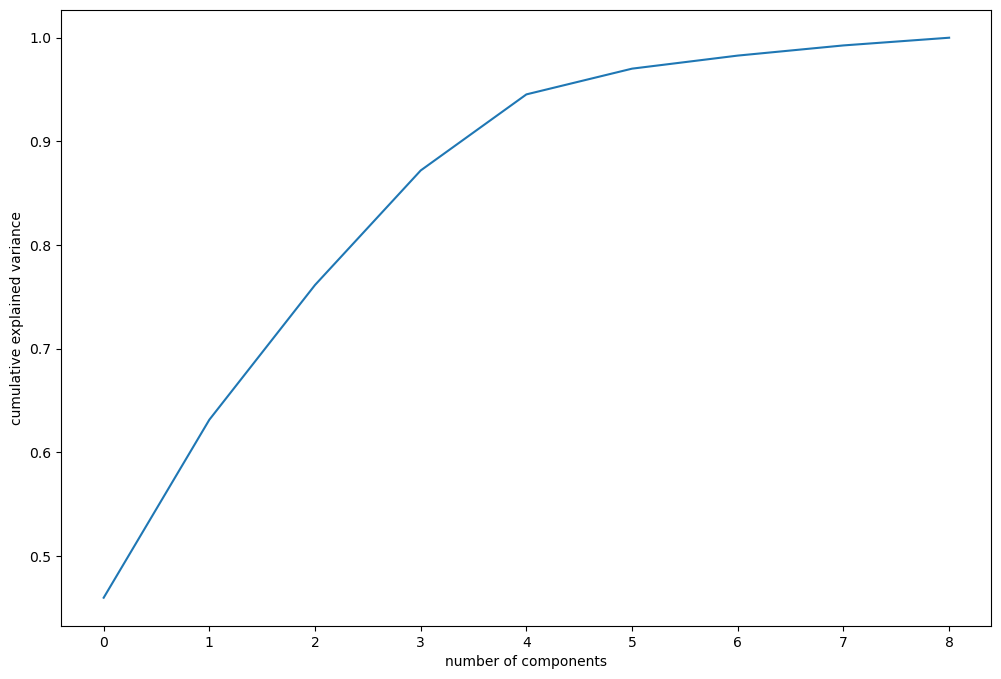

In [59]:
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()